In [2]:
####Importing the required packages and dataset for analyzation
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns

df=pd.read_csv('C:/Users/jeeva/OneDrive/Documents/Data cleaning dataset/Ecommerce_dataset_sample.csv',encoding='latin1')



In [3]:
####check the shape and info about the dataset
print(df.shape)
print(df.info())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [4]:
####check for the missing values in the dataset
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
####Since there is missing values, it could be dropped as it contains no value, and also it helps to reduce the data file size
df = df.dropna(subset=['CustomerID', 'Description'])

In [13]:
####Dataset after dropping the missing values
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  541909 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [19]:
####Dropping the duplicate values
df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)


Shape after removing duplicates: (541909, 8)


In [37]:
####Converting the datatypes and formatting the dataset as per the datatype
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['CustomerID']=df['CustomerID'].astype('object')


In [26]:
####Standardize the text field columns so that the data is smooth to analyze
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].apply(lambda x: x.title().strip() if isinstance(x, str) else x)

In [40]:
####Handling invalid values
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] >= 0]

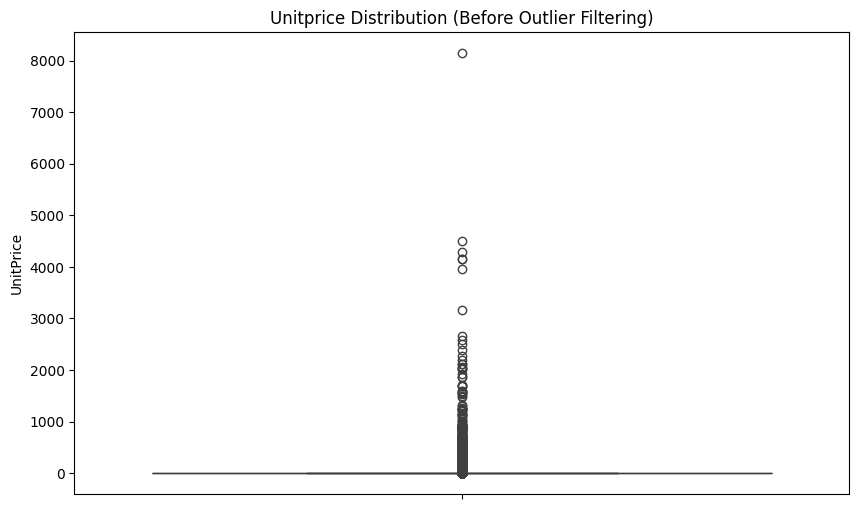

In [41]:
####Removing the extreme outliers 
mp.pyplot.figure(figsize=(10,6))
sns.boxplot(df['UnitPrice'])
mp.pyplot.title('Unitprice Distribution (Before Outlier Filtering)')
mp.pyplot.show()

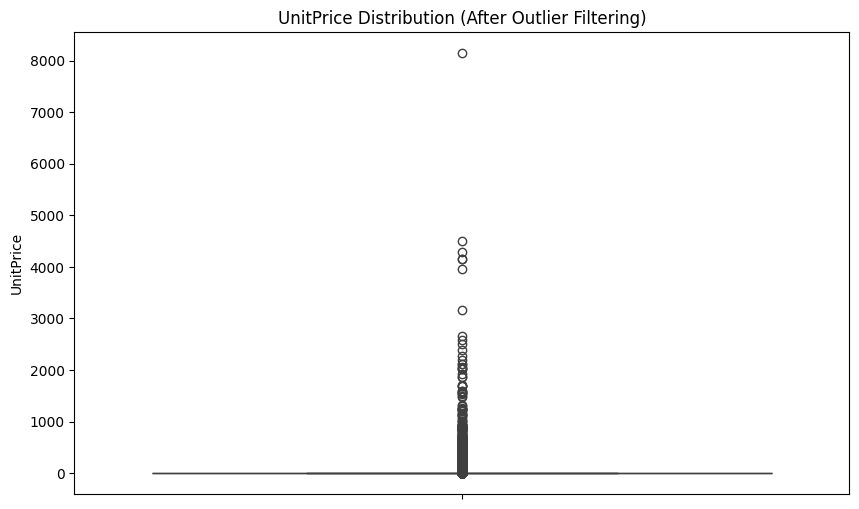

In [ ]:
####Removed UnitPrice>10000 as removing the outlier will help the aznalyzation not getting skewed(Based on the business workflow)
df = df[df['UnitPrice'] <= 10000]

mp.pyplot.figure(figsize=(10,6))
sns.boxplot(df['UnitPrice'])
mp.pyplot.title('UnitPrice Distribution (After Outlier Filtering)')
mp.pyplot.show()

In [43]:
####Cleaned dataset for further analyzation
print("\nCleaned Dataset Info:")
print(df.info())
print(df.describe())



Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 531281 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531281 non-null  object        
 1   StockCode    531281 non-null  object        
 2   Description  530689 non-null  object        
 3   Quantity     531281 non-null  int64         
 4   InvoiceDate  531281 non-null  datetime64[ns]
 5   UnitPrice    531281 non-null  float64       
 6   CustomerID   531281 non-null  object        
 7   Country      531281 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.5+ MB
None
            Quantity                    InvoiceDate      UnitPrice
count  531281.000000                         531281  531281.000000
mean       10.655335  2011-07-04 18:16:00.868692992       3.852659
min         1.000000            2010-12-01 08:26:00       0.000000
25%         1.000

In [46]:
#####Saving the cleaned data as file
df.to_csv('C:/Users/jeeva/OneDrive/Documents/Data cleaning project/Ecommerce_datacleaned.csv', index=False)